### Modified Cam Clay derivation

The Modified Cam Clay model is based on the following model of conservation of energy.

\begin{align}
dW = p^\prime d\varepsilon_v^p + qd\varepsilon_v^s
\end{align}

For the internal work it is assumed that when a sample is consolidated isotropically it will experience no deviatoric strain, thus:

\begin{align}
    dW(q=0) = p^\prime d\varepsilon_v^p + 0 
\end{align}

Similarly, it was assumed that at critical state there will be no volumetric strain:

\begin{align}
    dW(q = Mp^\prime) = p^\prime d\varepsilon_s^p + 0 
\end{align}    
The resultant of these two extremes is assumed to represent the soil during any other state:

\begin{align}
    dW &= \sqrt{(p^\prime d\varepsilon_v^p)^2 + (p^\prime d\varepsilon_s^p)^2}\\
    &= p^\prime\sqrt{(d\varepsilon_v^p)^2 + (d\varepsilon_s^p)^2}\\
\end{align}

Equating the internal and the external work:
\begin{align}
    dW_{ext} &= dW_{int}\\
    p^\prime d\varepsilon_v^p + qd\varepsilon_v^s &= p^\prime\sqrt{(d\varepsilon_v^p)^2 + (d\varepsilon_s^p)^2}\\
    \Rightarrow \frac{d\varepsilon^p_v}{d\varepsilon^p_s}&=\frac{-dq}{dp^\prime} = \frac{M^2-\eta^2}{2\eta}
\end{align}

Integrating:
\begin{align}
    F(q, p) = q^2 - M^2p^2\big(\frac{p^\prime_c}{p^\prime}-1\big) = 0
\end{align}

Which is the flow rule and yield surface for the modified Cam Clay model.

The stress increment for an elasto-plastic material can be calculated as:

\begin{align}
    d\sigma &= D^e(d\varepsilon - d\varepsilon^p)\\
\end{align}

$d\varepsilon^p$ can be shown to equal:

\begin{align}
d\varepsilon^p = 
    \frac{\partial G}{\partial \sigma^\prime}\frac{\big(\frac{\partial F}{\partial \sigma}\big)^T D^ed\varepsilon}{\big(\frac{\partial F}{\partial \sigma}\big)^T D^e \big(\frac{\partial G}{\partial \sigma}\big) + H}, \quad \text{where }H = \frac{dW_p}{d\varepsilon^p}
\end{align}

Subsequently, the D-matrix can be compiled as:

\begin{align}
D^{ep} =
    \begin{bmatrix}
        D^e - \frac{D^e \big(\frac{\partial G}{\partial \sigma^\prime}\big)\big(\frac{\partial F}{\partial \sigma^\prime}\big)^T D^e } {-\big(\frac{\partial F}{\partial W_p}\big)\big(\frac{\partial W_p}{\partial \varepsilon^p}\big)\big(\frac{\partial G}{\partial \sigma^\prime}\big) + \big(\frac{\partial F}{\partial \sigma^\prime}\big)^T D^e \big(\frac{\partial G}{\partial \sigma^\prime}\big)}
    \end{bmatrix}
\end{align}

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Input Parameters

M = 0.95
Lambda = 0.16
Kappa = 0.06
N = 2.7
Poisson = 0.2
Pc = 500
P0 = 80

pc_initial = Pc

# Controls

niterations = 30000
dstrain = 0.00001


# Matrices
D = np.zeros((6,6))
De = np.zeros((6,6))
dFds = np.zeros((6,1))
u = np.zeros((niterations,1))
p = np.zeros((niterations,1))
q = np.zeros((niterations,1))
e = np.zeros((niterations,1))
u = np.zeros((niterations,1))


# Initial State Calculations

V = N - Lambda*np.log(Pc) + Kappa*np.log(Pc/P0)
e[0] = V - 1

print('The initial void ratio before shearing is: %.3f' %e[0])

Stress = np.array([[P0], [P0], [P0], [0], [0], [0]])
Strain = np.array([[0], [0], [0], [0], [0], [0]])
p[0] = (Stress[0] + Stress[1] + Stress[2])/3
q[0] = Stress[0] - Stress[2]
F = q[0]**2 + (M*p[0])**2 - p[0]*Pc*M**2

# Computations
for i in range(niterations):
    e[i] = V-1 # Void Ratio 
    
    p[i] = (Stress[0] + Stress[1] + Stress[2])/3 # Mean Stress
    q[i] = Stress[0] - Stress[2] # Deviatoric Stress
    
    u[i] = q[i]/3 + P0 - p[i] # This is the distance btween total and effective stress paths
    
    if F < 0: # Did not yield; calculate new F
        F = q[i]**2 + (M*p[i])**2 - p[i]*Pc*M**2
    else: # Stress state is on yield surface; calculate new Pc
        F = 0
        Pc = ((q[i]/M)**2 + (p[i])**2)/p[i]
    
    # Formulate elastic stiffness matrix 
    K = V*p[i]/Kappa # K is the Bulk Modulus
    G = 3*K*(1-2*Poisson)/(2*(1+Poisson)) # G is the Shear Modulus
    
    for row in range(6): # Loop through rows 0 to 5
        for column in range(6): # Loop through columns 0 to 5
            if row == column and row <= 2:
                De[row,column] = K + 4*G/3
            elif row == column and row > 2:
                De[row,column] = G
            elif row <= 2 and column <= 2:
                De[row,column] = K - 2*G/3
                
    # Modify code here
    # Check if stress state reached yield
    # Not on yield surface; elastic matrix
    if F < 0: 
        # Compute D as De, D = De
        
    # Stress state is on yield surface; need to formulate new D-matrix
    else: 
        # Compute D = De - Dep
        # Use np.matmul to multiply matrices. 
        # For e.g., De*dFds = np.matmul(De, dFds)
        
        

    # Do not change anything below
    dStrain = np.array([[dstrain], [-0.5*dstrain], [-0.5*dstrain], [0], [0], [0]]) # Undrained
    dStress = np.matmul(D,dStrain) # Stress Increment
    Stress = Stress + dStress
    Strain = Strain + dStrain
    
    V = N - Lambda*np.log(Pc) + Kappa*np.log(Pc/p[i]) # Update volume
 

The initial void ratio before shearing is: 0.816


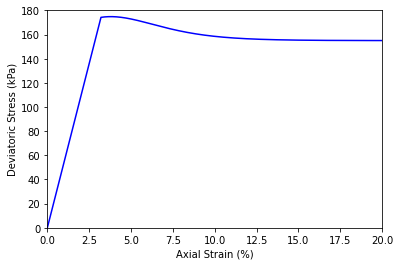

In [17]:
# Plot q vs axial strain

Axial_Strain = np.linspace(0,dstrain*100.*(niterations-1),niterations)  
plt.figure(figsize=(6,4))
plt.plot(Axial_Strain, q, color='b');
plt.xlim(0, niterations*dstrain*100)
plt.ylim(0,np.ceil(max(q)/10)*10)
plt.ylabel('Deviatoric Stress (kPa)');
plt.xlabel('Axial Strain (%)');

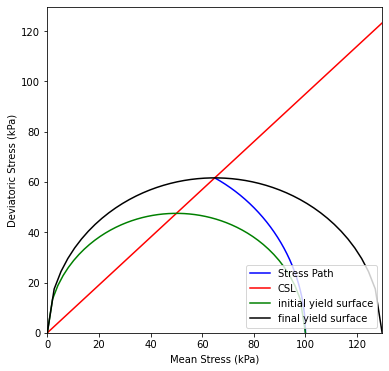

In [13]:
# create CSL data
p_CSL =  np.linspace(1,pc_initial*1.5)
q_CSL = M*p_CSL

# create initial yield surface
p_yield = np.linspace(0,pc_initial)
q_yield = np.zeros(len(p_yield))
for i in range(len(p_yield)):
    q_yield[i] = math.sqrt(M*M*p_yield[i]*(pc_initial - p_yield[i]))
    
    
# create final yield surface
pc_final = Pc
p_yield_final = np.linspace(0,pc_final)
q_yield_final = np.zeros(len(p_yield_final))
for i in range(len(p_yield_final)):
    q_yield_final[i] = math.sqrt(M*M*p_yield_final[i]*(pc_final - p_yield_final[i]))

# Plot stress path in q-p' plane    
plt.figure(figsize=(6,6))
plt.plot(p, q, color='b', label='Stress Path');
Max_Stress = max(pc_initial, Pc)
plt.plot([0, Max_Stress], [0, Max_Stress*M], color='r', label='CSL');
plt.plot(p_yield,q_yield,'g',label='initial yield surface')
plt.plot(p_yield_final,q_yield_final,'k',label='final yield surface')
plt.xlim(0, Max_Stress)
plt.ylim(0, Max_Stress)
plt.ylabel('Deviatoric Stress (kPa)');
plt.xlabel('Mean Stress (kPa)');
plt.legend(loc='lower right');

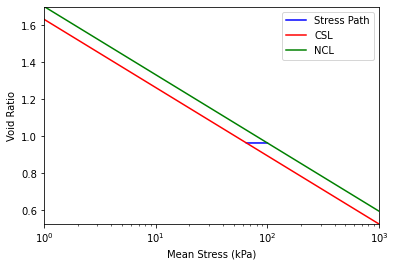

In [14]:
# Plot stress path in v-ln p' plane

plt.figure(figsize=(6,4))
plt.semilogx(p,e, color='b', label='Stress Path')
plt.semilogx([1,1000],[N-(Lambda-Kappa)*np.log(2)-1,N-(Lambda-Kappa)*np.log(2)-Lambda*np.log(1000)-1], color='r', label='CSL')
plt.semilogx([1,1000],[N-1,N-Lambda*np.log(1000)-1], color='g', label='NCL')
plt.xlim(1, np.ceil(np.max(q)/1000)*1000)
plt.ylim(N-(Lambda-Kappa)*np.log(2)-Lambda*np.log(np.ceil(np.max(q)/1000)*1000)-1,N-1)
plt.ylabel('Void Ratio');
plt.xlabel('Mean Stress (kPa)');
plt.legend(loc='upper right');

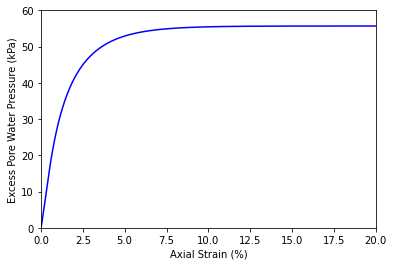

In [15]:
# Plot excess pore pressure vs axial strain

plt.figure(figsize=(6,4))
plt.plot(Axial_Strain, u, color='b');
plt.xlim(0, niterations*dstrain*100)
plt.ylim(np.floor(np.min(u)/10)*10,np.ceil(np.max(u)/10)*10)
plt.ylabel('Excess Pore Water Pressure (kPa)');
plt.xlabel('Axial Strain (%)');